target = https://catertrax.com/

jquery page pattern: https://catertrax.com/why-catertrax/traxers/page/3/
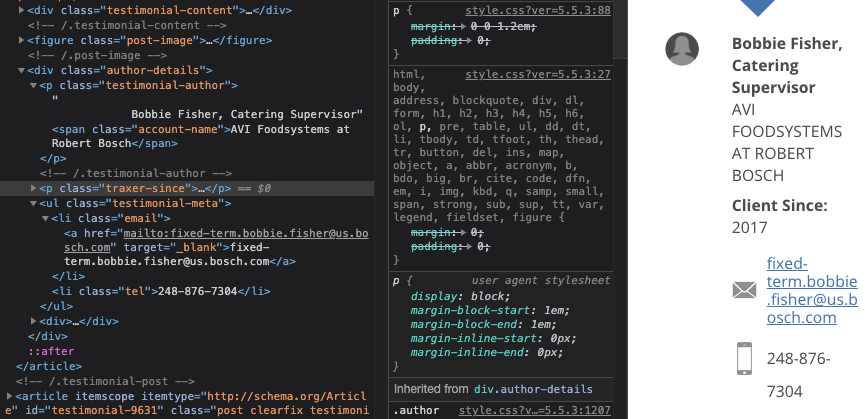
!! сайт сейчас не требует юзер агента

первое попадание - div id = testimonial-2364-3-0-0 -- совпадает для всех страниц
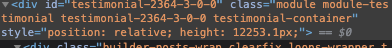

In [17]:
import requests
from bs4 import BeautifulSoup
import sys

In [20]:
FIELDS = ('author', 'client_since', 'client_kind', 'content_title', 'content_description', 'email', 'phone_number')

In [3]:
def get_page_data(url):
    response = requests.get(url)
    return response.text

In [22]:
jquery_page_pattern = 'https://catertrax.com/why-catertrax/traxers/page/5433534534/'
html = get_page_data(jquery_page_pattern)

In [18]:
def web_scrapper(html):
    soup = BeautifulSoup(html, 'lxml')
    testimonial = soup.find('div', id='testimonial-2364-3-0-0')
    articles = testimonial.find_all('article')
    
    if not articles:
        sys.exit('Blank page')
    
    for article in articles:
        
        author_details = article.find('div', class_='author-details')
        author = author_details.find('p', class_='testimonial-author').text.strip()
        client_since = author_details.find('p', class_='traxer-since').text.strip()
        
        content = article.find('div', class_='testimonial-content')
        client_kind = content.find('span', class_='testimonial-category').text.strip()
        content_title = content.find('h2').text.strip()
        content_description = content.find('p').text.strip()
        
        author_contacts = author_details.find('ul', class_='testimonial-meta')
        if author_contacts:
            email = author_contacts.find('li', class_='email').text.strip()
            phone_number = author_contacts.find('li', class_='tel').text.strip()
        else:
            email = None
            phone_number = None
            
        
        data = dict(zip(FIELDS, [author, client_since, client_kind, content_title, content_description,
                                email, phone_number]))
        
        print(data, end=3*'\n')
            
        
        
    
    

In [23]:
web_scrapper(html)

SystemExit: Blank page

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
